In [7]:
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
import os, sys
sys.path.insert(0, os.path.realpath(os.path.pardir))

In [9]:
from utils.config import cfg
from utils.tools import mask

In [10]:
from utils.utils import *
rebuild_bkk_pkl()

C:\Users\FACT-PC\Desktop\git_workspace\Data-Science-Project-2-2021-2-Nowcasting\utils\utils.py:166: FutureWarning: The default value of regex will change from True to False in a future version.
  filenames['FileName'] = filenames['FileName'].str.replace(".png","")


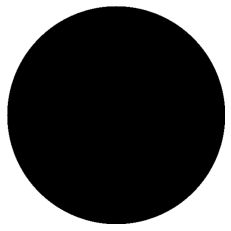

In [11]:
x, y, z = np.ogrid[:480, :480, :1]

circle_mask = np.where((x-480/2)**2 + (y-480/2)**2 <= (480/2)**2, 0, 1)

plt.axis('off')
plt.imshow(circle_mask, cmap='gray')
plt.show()

In [12]:
filenames = pd.read_pickle(cfg.ONM_PD.FOLDER_ALL)
filenames

,FileName,RADAR_RGB_PNG_PATH,RADAR_dBZ_PNG_PATH,RADAR_MASK_PATH
DateTime,,,,
2020-06-18 06:30:00,1592461954,bkk_radar_images_1,bkk_radar_images_dBZ_1,bkk_radar_images_mask_1
2020-06-18 06:35:00,1592462136,bkk_radar_images_1,bkk_radar_images_dBZ_1,bkk_radar_images_mask_1
2020-06-18 06:45:00,1592462768,bkk_radar_images_1,bkk_radar_images_dBZ_1,bkk_radar_images_mask_1
2020-06-18 06:50:00,1592463068,bkk_radar_images_1,bkk_radar_images_dBZ_1,bkk_radar_images_mask_1
2020-06-18 06:55:00,1592463277,bkk_radar_images_1,bkk_radar_images_dBZ_1,bkk_radar_images_mask_1
...,...,...,...,...
2021-06-28 20:05:00,1624910840,bkk_radar_images_13,bkk_radar_images_dBZ_13,bkk_radar_images_mask_13
2021-06-28 20:35:00,1624912646,bkk_radar_images_13,bkk_radar_images_dBZ_13,bkk_radar_images_mask_13
2021-06-28 20:45:00,1624913244,bkk_radar_images_13,bkk_radar_images_dBZ_13,bkk_radar_images_mask_13


In [17]:
from tqdm import tqdm

for idx in tqdm(range(filenames.shape[0])):
    mask_path = os.path.join(cfg.RADAR_MASK_PATH, filenames.iloc[idx].RADAR_MASK_PATH, filenames.iloc[idx].FileName + ".mask")
    mask.save_mask_file(circle_mask, mask_path)

100%|██████████| 85389/85389 [04:11<00:00, 338.90it/s]


In [8]:
list_path = [os.path.join(cfg.RADAR_MASK_PATH, filenames.iloc[i].RADAR_MASK_PATH, filenames.iloc[i].FileName + ".mask") for i in range(45000,45002)]
mask_file2 = mask.quick_read_masks(list_path)

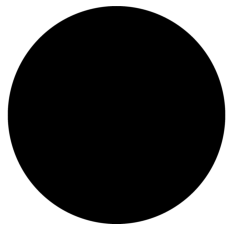

In [9]:
plt.axis('off')
plt.imshow(mask_file2[0][0], cmap='gray')
plt.show()

In [11]:
mask_file2[0][0]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [11]:
import zlib

In [13]:
f = open(list_path[0], 'rb')
dat = zlib.decompress(f.read())

out = np.frombuffer(dat, dtype=int).reshape((2034, 2048)).astype(bool)
f.close()

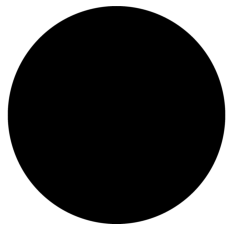

In [15]:
plt.axis('off')
plt.imshow(out, cmap='gray')
plt.show()